# Gradient Descent

- 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

X.shape:  (100, 1) y.shape:  (100, 1)


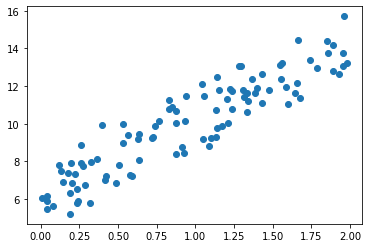

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6+4 * X + np.random.randn(100,1)
print("X.shape: ",X.shape,"y.shape: ", y.shape)
plt.scatter(X,y)

get_weight_updates() : w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수

- 예측 배열 y_pred는 np.dot(X,w1.T) + w0, 100개의 데이터가 있다면 예측값은 w0 + X(1)* w1 +X(2) * w1 +..+X(100) * w1 이며
  이는 입력배열 X와 w1배열의 내적임

In [2]:
def get_weight_updates(w1,w0,X,y, learning_rate=0.01):
    N = len(y)
    # w1_update, w0_date 를 각각 w1, w0 의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측배열 계산 후 예측값과 실제값의 차이 계산
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factor = np.ones((N,1))
    
    # w1, w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factor.T, diff))
    
    return w1_update, w0_update

In [3]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

y_pred = np.dot(X,w1.T) + w0
diff = y - y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update = -(2/100) * 0.01 * (np.dot(X.T,diff))
w0_update = -(2/100) * 0.01 * (np.dot(w0_factors.T,diff))
print(w1_update.shape, w0_update.shape)
w1,w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

get_weight_updates()을 반복적으로 호출하고 w1, w0을 업데이트하는 함수

In [9]:
def gradient_step(X,y,iters=10000):
    #w0, w1 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # iter만큼 반복적으로 get_weight_updates()호출 -> w1,w0 업데이트
    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [10]:
w1

array([[0.]])

In [11]:
w1

array([[0.]])

예측 오차 비용을 계산하는 함수 생성 및 경사 하강법 수행

In [12]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_step(X,y,iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X * w0
print('Gradient_Descent_Total_Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.022 w0: 6.162
Gradient_Descent_Total_Cost: 326.1824


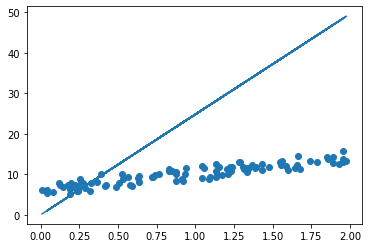

In [18]:
plt.scatter(X,y)
plt.plot(X,y_pred)

미니배치 확률적 경사 하강법을 활용해 최적의 비용함수 도출

In [26]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [27]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1: ",round(w1[0,0],3), "w0: ",round(w1[0,0],3))
y_pred = w1[0,0] * X +w0
print("Stochastic_Gradient_Descent_Total_Cost:{0:.4f}".format(get_cost(y,y_pred)))

w1:  4.028 w0:  4.028
Stochastic_Gradient_Descent_Total_Cost:0.9937


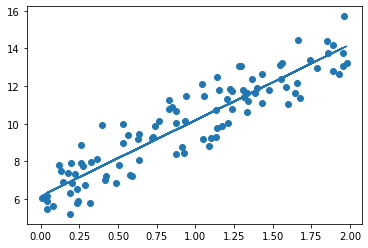

In [28]:
plt.scatter(X,y)
plt.plot(X,y_pred)

## permutation과 shuffle

- np.permutation은 원본은 변하지 않음
- shuffle은 원본을 바꿔버림

In [35]:
random = [1,2,3,4,5,6]
permu = np.random.permutation(random)
print("Permutation: ",permu)
print("원본 random : ",random)
np.random.shuffle(random)
print("shuffle: ", random)

Permutation:  [4 3 5 6 2 1]
원본 random :  [1, 2, 3, 4, 5, 6]
shuffle:  [5, 4, 2, 6, 1, 3]
